In [1]:
!pip install pandas==1.1.5 &> /dev/nul
!pip install tables==3.5.1 &> /dev/nul
!pip install cdt &> /dev/nul
!pip install rpy2 &> /dev/nul
!sudo apt install graphviz libgraphviz-dev graphviz-dev pkg-config &> /dev/nul
!pip install pygraphviz &> /dev/nul
!pip install pydot &> /dev/nul
!pip install pyparsing==1.5.7 &> /dev/nul
!pip install GML &> /dev/nul
!pip install unidecode &> /dev/nul
!pip install dowhy &> /dev/nul
!pip install statsmodels &> /dev/nul
!pip install pickle-mixin &> /dev/nul
!pip install pyyaml==5.4.1

     |████████████████████████████████| 636 kB 14.6 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0


No GPU automatically detected. Setting SETTINGS.GPU to 0, and SETTINGS.NJOBS to cpu_count.


<!DOCTYPE doctype html>
<html lang="en"> <head> <meta charset="utf-8"/> <meta content="ie=edge" http-equiv="x-ua-compatible"/><link href="https://cdn.statically.io/img/htmlsave.com/images/html-save-flat.png?f=auto" rel="icon" type="image/x-icon"/> <meta content="width=device-width, initial-scale=1" name="viewport"/><meta content="noindex" name="robots"><link href="https://cdn.statically.io/gh/savehtml/static/d6fc97f6/errordocstyle.min.css" rel="stylesheet" type="text/css"/> <script src="https://cdn.statically.io/gh/savehtml/static/70997bac/poweredby.js" type="text/javascript"></script></meta></head> <body> <main> <figure> <a href="https://htmlsave.com" rel="dofollow"></a> </figure><title>Error Found</title><section><header><h1>Error Found <a style="color:MediumSeaGreen;">404</a></h1></header><p>The page you were looking for doesn't exist on this server.</p><ul><li><a href="javascript:location.reload();">Try reloading the page</a></li><li><a href="javascript:history.back();">Go back to 
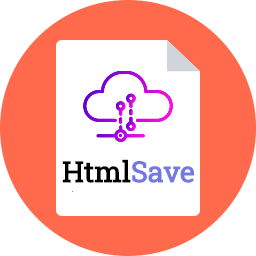

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import tables
import numpy as np
import scipy
import logging.config
import sys
import rpy2
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
import rpy2.robjects.packages as rpackages
from rpy2.robjects.vectors import StrVector
import GPUtil
import unidecode
import joblib
import torch
import tqdm
import requests
import difflib as dl
import sklearn
import cdt #CDT depends on a number of other packages, including these R packages: https://github.com/FenTechSolutions/CausalDiscoveryToolbox/blob/master/r_requirements.txt. 
#Please see below.
from cdt.causality.graph import GES
import networkx as nx
import GML
import pickle
import dowhy
from dowhy import CausalModel
import statsmodels
import statsmodels.api 
from IPython.display import Image, display
from google.colab import auth
from itertools import permutations

In [3]:
base = importr('base')
utils = importr('utils')

utils.chooseCRANmirror(ind=1)
packnames_CRAN_direct = ('devtools', 'BiocManager', 'sparsebn', 'pcalg', 'gRain', 'bnlearn') #Alternatively, 'http://www.bnlearn.com/releases/bnlearn_latest.tar.gz'
names_to_install_CRAN_direct = [x for x in packnames_CRAN_direct if not rpackages.isinstalled(x)]
if len(names_to_install_CRAN_direct) > 0:
    utils.install_packages(StrVector(names_to_install_CRAN_direct))

biocmanager = importr('BiocManager')
packnames_biocmanager = ('graph', 'RBGL', 'Rgraphviz', 'gRain')
names_to_install_biocmanager = [x for x in packnames_biocmanager if not rpackages.isinstalled(x)]
if len(names_to_install_biocmanager) > 0:
    biocmanager.install(StrVector(names_to_install_biocmanager))

devtools = importr('devtools')
packnames_github = ('cran/CAM', 'cran/D2C', 'cran/SID', 'Diviyan-Kalainathan/RCIT')
names_to_install_github = [x for x in packnames_github if not rpackages.isinstalled(x)]
if len(names_to_install_github) > 0:
    devtools.install_github(StrVector(names_to_install_github), force = True)

sparsebn = importr('sparsebn')
pcalg = importr('pcalg')
graph = importr('graph')
rbgl = importr('RBGL')
rgraphviz = importr('Rgraphviz')
bnlearn = importr('bnlearn')
cam = importr('CAM')
d2c = importr('D2C')
sid = importr('SID')
rcit = importr('RCIT')

R[write to console]: Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: Warning:
R[write to console]:  dependencies ‘graph’, ‘RBGL’, ‘Rgraphviz’ are not available

R[write to console]: also installing the dependencies ‘zoo’, ‘DEoptimR’, ‘lmtest’, ‘sparsebnUtils’, ‘ccdrAlgorithm’, ‘discretecdAlgorithm’, ‘abind’, ‘igraph’, ‘ggm’, ‘corpcor’, ‘robustbase’, ‘vcd’, ‘bdsmatrix’, ‘sfsmisc’, ‘fastICA’, ‘clue’, ‘RcppArmadillo’, ‘BH’, ‘gRbase’, ‘RcppEigen’


R[write to console]: trying URL 'https://cloud.r-project.org/src/contrib/zoo_1.8-9.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 793891 bytes (775 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]

Update all/some/none? [a/s/n]: a


R[write to console]: trying URL 'https://cloud.r-project.org/src/contrib/backports_1.4.1.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 26201 bytes (25 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to cons

* checking for file ‘/tmp/Rtmpo97YxY/remotes3e5aaae07a/cran-CAM-fbc593d/DESCRIPTION’ ... OK
* preparing ‘CAM’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘CAM_1.0.tar.gz’



R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: Downloading GitHub repo cran/D2C@HEAD

R[write to console]: Skipping 3 packages not available: RBGL, Rgraphviz, graph

R[write to console]: Installing 2 packages: lazy, randomForest

R[write to console]: Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cloud.r-project.org/src/contrib/lazy_1.2-16.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 21509 bytes (21 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]:

* checking for file ‘/tmp/Rtmpo97YxY/remotes3e12f27579/cran-D2C-482b186/DESCRIPTION’ ... OK
* preparing ‘D2C’:
* checking DESCRIPTION meta-information ... OK
* checking vignette meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘D2C_1.2.1.tar.gz’



R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: Downloading GitHub repo cran/SID@HEAD

R[write to console]: Skipping 2 packages not available: graph, RBGL

R[write to console]: Installing 2 packages: ggm, pcalg

R[write to console]: Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cloud.r-project.org/src/contrib/ggm_2.5.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 109414 bytes (106 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console

* checking for file ‘/tmp/Rtmpo97YxY/remotes3e2e312c26/cran-SID-9e4ab7e/DESCRIPTION’ ... OK
* preparing ‘SID’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘SID_1.0.tar.gz’



R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: Downloading GitHub repo Diviyan-Kalainathan/RCIT@HEAD

R[write to console]: Installing 1 packages: momentchi2

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cloud.r-project.org/src/contrib/momentchi2_0.1.5.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 10133 bytes

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[wr

* checking for file ‘/tmp/Rtmpo97YxY/remotes3e5e1b56a8/Diviyan-Kalainathan-RCIT-c97f91c/DESCRIPTION’ ... OK
* preparing ‘RCIT’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted ‘LazyData’ from DESCRIPTION
* building ‘RCIT_0.1.0.tar.gz’



R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
cdt.SETTINGS.GPU
cdt.SETTINGS.NJOBS
cdt.SETTINGS.NJOBS = 3
cdt.SETTINGS.verbose = False

In [6]:
auth.authenticate_user()

# Import Data
from google.colab import drive
drive.mount('/content/drive')
root = "/content/drive/My Drive/Colab Notebooks/Nino Causal Models/Data/" 
data = pd.read_csv(root+"FCDO_data.csv") # Import prepared data
data_reduced = pd.read_csv(root+"FCDO_data_dim_reduced.csv") # Import prepared data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
data.columns

Index(['ADM3_EN', 'IDAHO_EPSCOR_TERRACLIMATE_Max_Climate_Water_Deficit',
       'IDAHO_EPSCOR_TERRACLIMATE_SD_Max_Climate_Water_Deficit',
       'IDAHO_EPSCOR_TERRACLIMATE_Mean_Climate_Water_Deficit',
       'IDAHO_EPSCOR_TERRACLIMATE_SD_Mean_Climate_Water_Deficit',
       'IDAHO_EPSCOR_TERRACLIMATE_Min_Climate_Water_Deficit',
       'IDAHO_EPSCOR_TERRACLIMATE_SD_Min_Climate_Water_Deficit',
       'ECMWF_ERA5_LAND_MONTHLY_Max_Evaporation_Bare',
       'ECMWF_ERA5_LAND_MONTHLY_SD_Max_Evaporation_Bare',
       'ECMWF_ERA5_LAND_MONTHLY_Max_Evaporation_Potential',
       ...
       'Strategic developments', 'Violence against civilians',
       'total_event_types', '('fatalities', 'Battles')',
       '('fatalities', 'Explosions/Remote violence')',
       '('fatalities', 'Protests')', '('fatalities', 'Riots')',
       '('fatalities', 'Strategic developments')',
       '('fatalities', 'Violence against civilians')',
       '('total_fatalities', '')'],
      dtype='object', length=389)

### **Prepare Data as in Feature Engineering scripts**

In [8]:
class Prepare_Data:
    def __init__(self, data):
        """
        Class function to preprocess data to data that can we used for feature engineering. Imports the raw data and exports data that 
        immediatly fits random forest model. Since we are using random forest model, it is not necessary to scale data. Random forest models
        ares also able to deal with colinearity within features. Also since there are so many columns we do not rename them yet.
        :param :
        :param :
        """
            # Create logger
        log_format = '%(asctime)s - %(name)s - %(levelname)s - %(funcName)s - %(message)s'
        logging.basicConfig(format=log_format, level=logging.INFO, stream=sys.stdout)
        logger = logging.getLogger()
        self.data = data
        self.logger = logging.getLogger(__name__)

    def prepare_data(self):
        """
        This functions starts the pre processing activities for the random forest model
        :return:
        """
        self.logger.info("start preprocessing data")

        # Change the object types
        self.change_object_type()
        # Deal with awkward column string names
        self.deal_with_string_column_names()
        # Add new features based on range
        self.include_range_data()
        # Deal with missing data
        self.deal_with_missing_data()

        return self.data

    def change_object_type(self):
        """
        Since all the data are floats, we convert the data type.
        :return:
        """

        self.logger.info("start initiating data")
        data = self.data

        # Eliminate all rows where there is no sales price present
        data.replace(['--'], [np.nan], inplace=True)  # replace -- by np.nan
        data.loc[:, data.columns != 'ADM3_EN'] = data.loc[:, data.columns != 'ADM3_EN'].apply(pd.to_numeric, errors='raise')
        self.data=data

    def deal_with_string_column_names(self):
        """
        This functions adjusts column names.
        :return:
        """

        self.logger.info("deal with missing data")
        data = self.data
        
        # #Strip symbols from column names for efficient column selection
        data.columns = data.columns.str.replace("'","")
        data.columns = data.columns.str.replace("''","")
        data.columns = data.columns.str.replace("(","")
        data.columns = data.columns.str.replace(")","")

        self.data = data

    def include_range_data(self):
        """
        Create new features based on range between the minimum and the maximum value of that feature.
        :return:
        """

        self.logger.info("Start adding range features.")
        data = self.data
        
        # Find columns minimums and maximums. (Note: there are no min/max columns (without capital letter))
        min_cols = [col for col in data.columns if 'Min' in col]
        max_cols = [col for col in data.columns if 'Max' in col]
        
        # Find which column from min corresponds with max: #https://docs.python.org/3/library/difflib.html#difflib.get_close_matches
        for min_col in min_cols:
            max_col = dl.get_close_matches(min_col, max_cols, n=1)[0]
            rangename=min_col.replace('Min','Range')
            data[rangename] = data[max_col]-data[min_col]

        self.data=data
        
    def deal_with_missing_data(self):
        """
        This functions deals with missing data and replaces it with the nodes. 
        :return:
        """

        self.logger.info("deal with missing data")
        data = self.data
        
        #Replace inf by NaN values
        data.replace([np.inf, -np.inf], np.nan, inplace=True)
        
        #Fill NaN values
        data.fillna(data.mean(), inplace=True)
        
        self.data = data



In [9]:
pre_processing = Prepare_Data(data)
prepared_data = pre_processing.prepare_data()

2021-12-21 16:59:08,009 - __main__ - INFO - prepare_data - start preprocessing data
2021-12-21 16:59:08,011 - __main__ - INFO - change_object_type - start initiating data
2021-12-21 16:59:08,248 - __main__ - INFO - deal_with_string_column_names - deal with missing data
2021-12-21 16:59:08,257 - __main__ - INFO - include_range_data - Start adding range features.
2021-12-21 16:59:09,566 - __main__ - INFO - deal_with_missing_data - deal with missing data


In [10]:
prepared_data.head(5)

,ADM3_EN,IDAHO_EPSCOR_TERRACLIMATE_Max_Climate_Water_Deficit,IDAHO_EPSCOR_TERRACLIMATE_SD_Max_Climate_Water_Deficit,IDAHO_EPSCOR_TERRACLIMATE_Mean_Climate_Water_Deficit,IDAHO_EPSCOR_TERRACLIMATE_SD_Mean_Climate_Water_Deficit,IDAHO_EPSCOR_TERRACLIMATE_Min_Climate_Water_Deficit,IDAHO_EPSCOR_TERRACLIMATE_SD_Min_Climate_Water_Deficit,ECMWF_ERA5_LAND_MONTHLY_Max_Evaporation_Bare,ECMWF_ERA5_LAND_MONTHLY_SD_Max_Evaporation_Bare,ECMWF_ERA5_LAND_MONTHLY_Max_Evaporation_Potential,ECMWF_ERA5_LAND_MONTHLY_SD_Max_Evaporation_Potential,ECMWF_ERA5_LAND_MONTHLY_Max_Evaporation_Top_Canopy,ECMWF_ERA5_LAND_MONTHLY_SD_Max_Evaporation_Top_Canopy,ECMWF_ERA5_LAND_MONTHLY_Max_Evaporation_Total,ECMWF_ERA5_LAND_MONTHLY_SD_Max_Evaporation_Total,ECMWF_ERA5_LAND_MONTHLY_Max_Evaporation_Veget_Transpire,ECMWF_ERA5_LAND_MONTHLY_SD_Max_Evaporation_Veget_Transpire,ECMWF_ERA5_LAND_MONTHLY_Max_Evaporation_Water_Excluding_Oceans,ECMWF_ERA5_LAND_MONTHLY_SD_Max_Evaporation_Water_Excluding_Oceans,ECMWF_ERA5_LAND_MONTHLY_Mean_Evaporation_Bare,ECMWF_ERA5_LAND_MONTHLY_SD_Mean_Evaporation_Bare,ECMWF_ERA5_LAND_MONTHLY_Mean_Evaporation_Potential,ECMWF_ERA5_LAND_MONTHLY_SD_Mean_Evaporation_Potential,ECMWF_ERA5_LAND_MONTHLY_Mean_Evaporation_Top_Canopy,ECMWF_ERA5_LAND_MONTHLY_SD_Mean_Evaporation_Top_Canopy,ECMWF_ERA5_LAND_MONTHLY_Mean_Evaporation_Total,ECMWF_ERA5_LAND_MONTHLY_SD_Mean_Evaporation_Total,ECMWF_ERA5_LAND_MONTHLY_Mean_Evaporation_Veget_Transpire,ECMWF_ERA5_LAND_MONTHLY_SD_Mean_Evaporation_Veget_Transpire,ECMWF_ERA5_LAND_MONTHLY_Mean_Evaporation_Water_Excluding_Oceans,ECMWF_ERA5_LAND_MONTHLY_SD_Mean_Evaporation_Water_Excluding_Oceans,ECMWF_ERA5_LAND_MONTHLY_Min_Evaporation_Bare,ECMWF_ERA5_LAND_MONTHLY_SD_Min_Evaporation_Bare,ECMWF_ERA5_LAND_MONTHLY_Min_Evaporation_Potential,ECMWF_ERA5_LAND_MONTHLY_SD_Min_Evaporation_Potential,ECMWF_ERA5_LAND_MONTHLY_Min_Evaporation_Top_Canopy,ECMWF_ERA5_LAND_MONTHLY_SD_Min_Evaporation_Top_Canopy,ECMWF_ERA5_LAND_MONTHLY_Min_Evaporation_Total,ECMWF_ERA5_LAND_MONTHLY_SD_Min_Evaporation_Total,ECMWF_ERA5_LAND_MONTHLY_Min_Evaporation_Veget_Transpire,...,ECMWF_ERA5_LAND_MONTHLY_Skin_Range_Temperature,ECMWF_ERA5_LAND_MONTHLY_Skin_SD_Range_Temperature,ECMWF_ERA5_LAND_MONTHLY_Soil_Level1_Range_Temperature_0cm_7cm,ECMWF_ERA5_LAND_MONTHLY_Soil_Level1_SD_Range_Temperature_0cm_7cm,ECMWF_ERA5_LAND_MONTHLY_Soil_Level2_Range_Temperature_7cm_28cm,ECMWF_ERA5_LAND_MONTHLY_Soil_Level2_SD_Range_Temperature_7cm_28cm,ECMWF_ERA5_LAND_MONTHLY_Soil_Level3_Range_Temperature_28cm_100cm,ECMWF_ERA5_LAND_MONTHLY_Soil_Level3_SD_Range_Temperature_28cm_100cm,ECMWF_ERA5_LAND_MONTHLY_Soil_Level4_Range_Temperature_100cm_289cm,ECMWF_ERA5_LAND_MONTHLY_Soil_Level4_SD_Range_Temperature_100cm_289cm,ECMWF_ERA5_MONTHLY_0_Percentile_Range_Dew_Temperature,ECMWF_ERA5_MONTHLY_SD_Range_Dew_Temperature,NASA_NOAH01_Range_Soil_Temperature_0cm_10cm,NASA_NOAH01_SD_Range_Soil_Temperature_0cm_10cm,NASA_NOAH01_Range_Soil_Temperature_100cm_200cm,NASA_NOAH01_SD_Range_Soil_Temperature_100cm_200cm,NASA_NOAH01_Range_Soil_Temperature_10cm_40cm,NASA_NOAH01_SD_Range_Soil_Temperature_10cm_40cm,NASA_NOAH01_Range_Soil_Temperature_40cm_100cm,NASA_NOAH01_SD_Range_Soil_Temperature_40cm_100cm,NASA_NOAH01_Range_Surface_Air_Temperature,NASA_NOAH01_SD_Range_Surface_Air_Temperature,NASA_NOAH01_Range_Surface_Radiative_Temperature,NASA_NOAH01_SD_Range_Surface_Radiative_Temperature,IDAHO_EPSCOR_TERRACLIMATE_Range_Vapor_Pressure,IDAHO_EPSCOR_TERRACLIMATE_SD_Range_Vapor_Pressure,IDAHO_EPSCOR_TERRACLIMATE_Range_Vapor_Pressure_Deficit,IDAHO_EPSCOR_TERRACLIMATE_SD_Range_Vapor_Pressure_Deficit,IDAHO_EPSCOR_TERRACLIMATE_Range_Wind_Speed_At10m,IDAHO_EPSCOR_TERRACLIMATE_SD_Range_Wind_Speed_At10m,NASA_NOAH01_Range_Surface_Wind_Speed,NASA_NOAH01_SD_Range_Surface_Wind_Speed,inuncoast_historical_nosub_hist_Coastal_Flood_Range,inuncoast_historical_nosub_hist_Coastal_Flood_SD_Range,inunriverine_historical_nosub_hist_Riverine_Flood_Range,inunriverine_historical_nosub_hist_Coastal_Riverine_SD_Range,hazard_ls_arup_Landslide_Ra

## **Causal Modelling**

In [12]:
class StaticCausalModel:
  # Note this class function mixes cdt functions to extract the causal graph with dowhy functions to identify, estimate and refute the causal effect.
  def __init__(self, data_to_graph, feature_selection, method_parameters, treatment, outcome):
    self.features = feature_selection
    self.data = data_to_graph[self.features]
    self.method_params = method_parameters
    self.Glasso = cdt.independence.graph.Glasso()
    self.ges = cdt.causality.graph.GIES()
    self.treatment = treatment
    self.outcome = outcome

  def networkx_graph(self):
    skeleton = self.Glasso.predict(self.data, alpha=1)#, max_iter=20000)
    return self.ges.predict(self.data, skeleton) 

  def extract_causal_graph(self):
    output_graph = StaticCausalModel.networkx_graph(self)
    nx.write_gml(output_graph, "G.gml")
    # CausalModel is a dowhy function to initiate the model based on the extracted causal graph. 
    return CausalModel(data = self.data, treatment=self.treatment, outcome=self.outcome, graph= 'G.gml') # Note this is the model input required by dowhy

  def return_directed_paths(self):
    DAG = StaticCausalModel.networkx_graph(self)
    combinations = list(permutations(DAG.nodes(), 2))
    return [combination  for combination in combinations if nx.has_path(DAG ,combination[0], combination[1])]

  def return_paths(self, start, end):
    DAG = StaticCausalModel.networkx_graph(self)
    return [path for path in nx.all_simple_paths(DAG ,start, end)]

  def view_graph(self):
    return StaticCausalModel.extract_causal_graph(self).view_model(layout="dot")

  def identification(self):
    return StaticCausalModel.extract_causal_graph(self).identify_effect()

  def estimation(self):
    #Dowhy function estimate_effect to estimate effect. Note we use generalized linear model
    glm_estimate = StaticCausalModel.extract_causal_graph(self).estimate_effect(identified_estimand = StaticCausalModel.identification(self), method_name="backdoor.generalized_linear_model", 
                                                                                test_significance=True, confidence_intervals = True, method_params = self.method_params)
    return glm_estimate, glm_estimate.get_standard_error(method = "bootstrap") 

  def refutation_by_random_common_cause(self):
    glm_estimate, glm_estimate_standard_error = StaticCausalModel.estimation(self)
    random_common_cause = StaticCausalModel.extract_causal_graph(self).refute_estimate(StaticCausalModel.identification(self), glm_estimate, method_name="random_common_cause")
    return random_common_cause

  def refutation_by_bootstrap(self):
    glm_estimate, glm_estimate_standard_error = StaticCausalModel.estimation(self)
    placebo = StaticCausalModel.extract_causal_graph(self).refute_estimate(StaticCausalModel.identification(self), glm_estimate, method_name="bootstrap_refuter")
    return placebo

  def refutation_by_data_subset(self):
    glm_estimate, glm_estimate_standard_error = StaticCausalModel.estimation(self)
    subset=StaticCausalModel.extract_causal_graph(self).refute_estimate(StaticCausalModel.identification(self), glm_estimate, method_name="data_subset_refuter", subset_fraction=0.9, random_seed = 1)
    return subset

  def refutation_by_unobserved_common_cause(self):
    glm_estimate, glm_estimate_standard_error = StaticCausalModel.estimation(self, treatment, outcome)
    unobserved=StaticCausalModel.extract_causal_graph(self).refute_estimate(StaticCausalModel.identification(self, treatment, outcome), glm_estimate, method_name="add_unobserved_common_cause", confounders_effect_on_treatment="binary_flip", 
                                         confounders_effect_on_outcome="linear", effect_strength_on_treatment=0.01, effect_strength_on_outcome=0.02)
    return unobserved

In [14]:
features_top_RF = ['IDAHO_EPSCOR_TERRACLIMATE_SD_Min_Precipitation_Accumulation','ECMWF_ERA5_LAND_MONTHLY_Max_Low_LeafArea','NASA_NOAH01_Mean_Surface_Wind_Speed',
                              'ECMWF_ERA5_LAND_MONTHLY_Dew_Range_Temperature_2m','ECMWF_ERA5_LAND_MONTHLY_Soil_Level2_SD_Mean_Temperature_7cm_28cm', 'Cattle_SD',
                              'NASA_NOAH01_SD_Range_Soil_Moisture_0cm_10cm',  'ECMWF_ERA5_LAND_MONTHLY_Soil_Level1_SD_Mean_Temperature_0cm_7cm',
                              'NASA_NOAH01_SD_Min_Latent_Heat_Net_Flux', 'NASA_NOAH01_Range_Soil_Heat_Flux','fatalities, Battles','Strategic developments',
                              'Violence against civilians','total_event_types','fatalities, Violence against civilians', 'total_fatalities, ']

dim_reduced_features_top_RF = ['Water_Runoff', 'Soil_Level', 'Soil_Water', 'Precipitation', 'Soil_Level', 'Groundwater_Runoff', 'Temperature', 'Latent_Heat',
                               'Soil_Moisture', 'Evaporation', 'Skin_Reservoir', 'fatalities, Battles','Strategic developments',
                              'Violence against civilians','total_event_types','fatalities, Violence against civilians', 'total_fatalities, ']

                    

feature_selection = dim_reduced_features_top_RF

treatment = 'Water_Runoff'
outcome = 'total_fatalities, '

method_parameters = {'num_null_simulations':50, 'method': 'bootstrap', 'num_simulations':50, 'control_value':0, 'treatment_value':1, 
                 'need_conditional_estimates': False, 'fit_method': "statsmodels", 'glm_family':statsmodels.api.families.NegativeBinomial(alpha=0.001)} #Conflicts are sticky. Thus, we use the Negative Binomial distributions. Alternatively, one can use Poisson()

2021-12-21 17:03:50,555 - dowhy.causal_model - INFO - summary - Model to find the causal effect of treatment ['Water_Runoff'] on outcome ['total_fatalities, ']


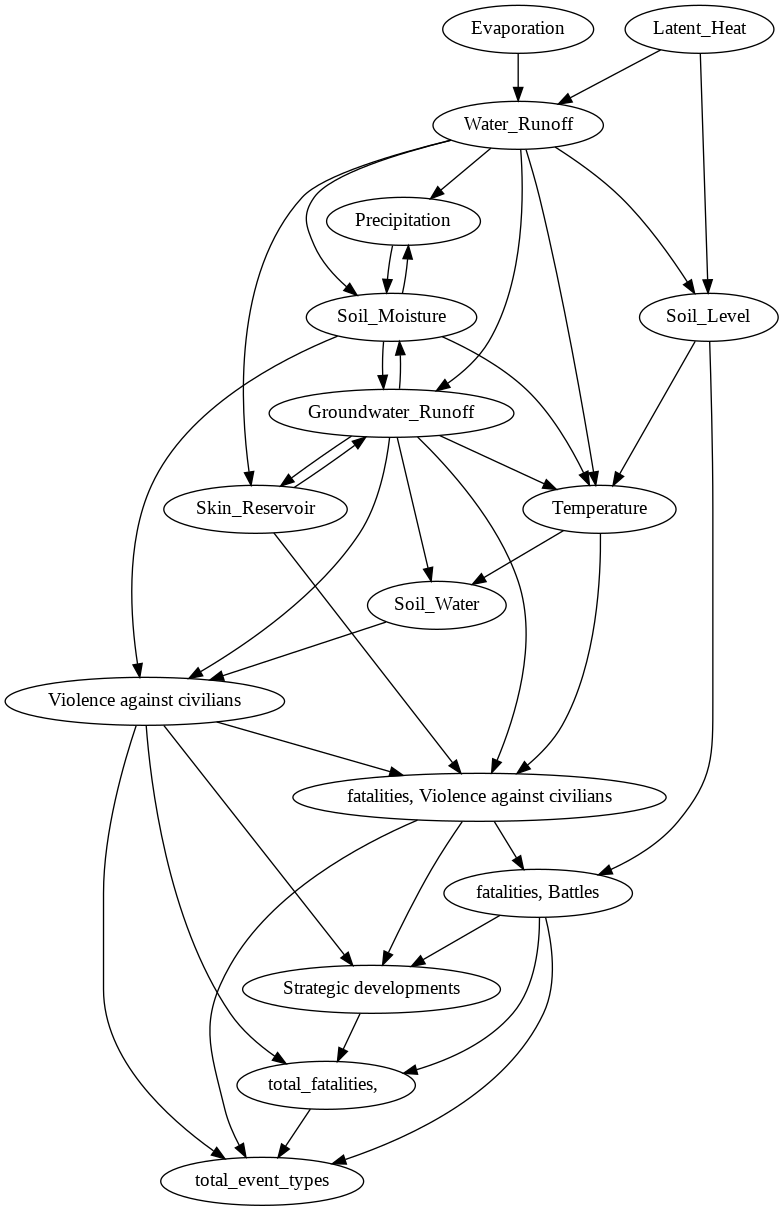

In [16]:
causal_model = StaticCausalModel(data_reduced, feature_selection, method_parameters, treatment, outcome)
causal_model.view_graph()
display(Image(filename="causal_model.png"))

In [32]:
identified_effect = causal_model.identification()
print(identified_effect)

2021-12-21 10:13:16,655 - dowhy.causal_model - INFO - summary - Model to find the causal effect of treatment ['IDAHO_EPSCOR_TERRACLIMATE_SD_Min_Precipitation_Accumulation'] on outcome ['total_fatalities, ']
2021-12-21 10:13:16,663 - dowhy.causal_identifier - INFO - build_backdoor_estimands_dict - All common causes are observed. Causal effect can be identified.
2021-12-21 10:13:16,672 - dowhy.causal_identifier - INFO - identify_ate_effect - Instrumental variables for treatment and outcome:[]
2021-12-21 10:13:16,675 - dowhy.causal_identifier - INFO - identify_ate_effect - Frontdoor variables for treatment and outcome:['fatalities, Battles']
2021-12-21 10:13:16,686 - dowhy.causal_identifier - INFO - build_backdoor_estimands_dict - All common causes are observed. Causal effect can be identified.
2021-12-21 10:13:16,695 - dowhy.causal_identifier - INFO - build_backdoor_estimands_dict - All common causes are observed. Causal effect can be identified.
Estimand type: nonparametric-ate

### Est

In [33]:
estimated_effect, standard_error = causal_model.estimation()
print(estimated_effect, f'Standard error of the estimate: {standard_error}.')

2021-12-21 10:13:24,065 - dowhy.causal_model - INFO - summary - Model to find the causal effect of treatment ['IDAHO_EPSCOR_TERRACLIMATE_SD_Min_Precipitation_Accumulation'] on outcome ['total_fatalities, ']
2021-12-21 10:13:25,424 - dowhy.causal_model - INFO - summary - Model to find the causal effect of treatment ['IDAHO_EPSCOR_TERRACLIMATE_SD_Min_Precipitation_Accumulation'] on outcome ['total_fatalities, ']
2021-12-21 10:13:25,428 - dowhy.causal_identifier - INFO - build_backdoor_estimands_dict - All common causes are observed. Causal effect can be identified.
2021-12-21 10:13:25,437 - dowhy.causal_identifier - INFO - identify_ate_effect - Instrumental variables for treatment and outcome:[]
2021-12-21 10:13:25,440 - dowhy.causal_identifier - INFO - identify_ate_effect - Frontdoor variables for treatment and outcome:['fatalities, Battles']
2021-12-21 10:13:25,445 - dowhy.causal_identifier - INFO - build_backdoor_estimands_dict - All common causes are observed. Causal effect can be id

## **Get Causal Output**

In [ ]:
# Get relevant Treatments:
relevant_treatments = ['Precipitation', 'Evapotranspiration', 'Anomalous Evapotranspiration', '# Animals','Calorie Delivery Fraction','% Pastureland','Crop Yield Gap','% Cropland of Total Land','Wilfires']#,'riverine_flood_score','riverine_flood_score','drought_score','storm_score_category']
outcome = ['# Conflict Fatalities']

In [ ]:
#Create the output DataFrame
causal_output = pd.DataFrame(data=causal_model.return_directed_paths(), columns=['Treatment','Outcome']) #Return all the possible combinations for which directed paths exist
causal_output = causal_output[causal_output['Outcome'].isin(outcome)] #Filter for outcome on reported fatalities
causal_output = causal_output[causal_output['Treatment'].isin(relevant_treatments)].reset_index(drop=True) #Filter for treatment on relevant treatments
causal_output['Paths'] = [causal_model.return_paths(causal_output.loc[i,'Treatment'], causal_output.loc[i,'Outcome']) for i in range(0,len(causal_output))] # return the actual paths
causal_output

,Treatment,Outcome,Paths
0,Evapotranspiration,# Conflict Fatalities,"[[Evapotranspiration, Population Count & Densi..."
1,Anomalous Evapotranspiration,# Conflict Fatalities,"[[Anomalous Evapotranspiration, % Pastureland,..."
2,Precipitation,# Conflict Fatalities,"[[Precipitation, Anomalous Evapotranspiration,..."
3,% Pastureland,# Conflict Fatalities,"[[% Pastureland, # Conflict Fatalities]]"
4,Wilfires,# Conflict Fatalities,"[[Wilfires, Evapotranspiration, Population Cou..."


In [ ]:
revised_treatments = list(causal_output['Treatment'])
print(revised_treatments)
print(list(causal_output['Treatment']))

['Evapotranspiration', 'Anomalous Evapotranspiration', 'Precipitation', '% Pastureland', 'Wilfires']
['Evapotranspiration', 'Anomalous Evapotranspiration', 'Precipitation', '% Pastureland', 'Wilfires']


In [ ]:
#Check If Causal effects exist:
causal_effects = [] #inititiate Dataframe
for treatment in revised_treatments:
  print(treatment)
  data_prepared = data_prep(df5, treatment, outcome, feature_selection, month_date=None, region=None)
  data_to_graph = data_prepared.preprocess()
  causal_model = StaticCausalModel(data_to_graph, method_parameters)
  try:
    identified_effect = causal_model.identification()
    try:
      estimated_effect, standard_error = causal_model.estimation()
      print(treatment, estimated_effect.value, standard_error)
      causal_effects.append([treatment,estimated_effect.value, (standard_error)])
      print([treatment,estimated_effect.value, standard_error])
    except:
      continue
  except:
    continue 

Evapotranspiration
Anomalous Evapotranspiration
Anomalous Evapotranspiration 0.0070135794785652905 0.002156696116836184
['Anomalous Evapotranspiration', 0.0070135794785652905, 0.002156696116836184]
Precipitation
Precipitation 0.012341616505590736 0.0019309954123663275
['Precipitation', 0.012341616505590736, 0.0019309954123663275]
% Pastureland
% Pastureland 0.006204743755633402 0.001749427622046683
['% Pastureland', 0.006204743755633402, 0.001749427622046683]
Wilfires


In [ ]:
causal_effects
effect_dataframe = pd.DataFrame(causal_effects, columns=['Treatment','Causal_Effect','Standard_Deviation'])
print(effect_dataframe)

                      Treatment  Causal_Effect  Standard_Deviation
0  Anomalous Evapotranspiration       0.007014            0.002157
1                 Precipitation       0.012342            0.001931
2                 % Pastureland       0.006205            0.001749


In [ ]:
class StaticCausalModel2:
  # Note this class function mixes cdt functions to extract the causal graph with dowhy functions to identify, estimate and refute the causal effect.
  def __init__(self, data_to_graph, method_parameters):
    self.data = data_to_graph
    self.method_params = method_parameters
    self.Glasso = cdt.independence.graph.Glasso()
    self.ges = cdt.causality.graph.GIES()

  def networkx_graph(self):
    skeleton = self.Glasso.predict(self.data, alpha=1)#, max_iter=20000)
    return self.ges.predict(self.data, skeleton) 

  def extract_causal_graph(self):
    output_graph = StaticCausalModel.networkx_graph(self)
    nx.write_gml(output_graph, "G.gml")
    # CausalModel is a dowhy function to initiate the model based on the extracted causal graph. 
    return CausalModel2(data = self.data, treatment=treatment, outcome=outcome, graph= 'G.gml') # Note this is the model input required by dowhy

  def return_directed_paths(self):
    DAG = StaticCausalModel.networkx_graph(self)
    combinations = list(permutations(DAG.nodes(), 2))
    return [combination  for combination in combinations if nx.has_path(DAG ,combination[0], combination[1])]

  def return_paths(self, start, end):
    DAG = StaticCausalModel.networkx_graph(self)
    return [path for path in nx.all_simple_paths(DAG ,start, end)]

  def view_graph(self):
    return StaticCausalModel.extract_causal_graph(self).view_model(layout="dot")

  def identification(self):
    return StaticCausalModel.extract_causal_graph(self).identify_effect()

  def estimation(self):
    #Dowhy function estimate_effect to estimate effect. Note we use generalized linear model
    glm_estimate = StaticCausalModel.extract_causal_graph(self).estimate_effect(identified_estimand = StaticCausalModel.identification(self), method_name="backdoor.generalized_linear_model", 
                                                                                test_significance=True, confidence_intervals = True, method_params = self.method_params)
    return glm_estimate, glm_estimate.get_standard_error(method = "bootstrap") 

  def refutation_by_random_common_cause(self):
    glm_estimate, glm_estimate_standard_error = StaticCausalModel.estimation(self)
    random_common_cause = StaticCausalModel.extract_causal_graph(self).refute_estimate(StaticCausalModel.identification(self), glm_estimate, method_name="random_common_cause")
    return random_common_cause

  def refutation_by_bootstrap(self):
    glm_estimate, glm_estimate_standard_error = StaticCausalModel.estimation(self)
    placebo = StaticCausalModel.extract_causal_graph(self).refute_estimate(StaticCausalModel.identification(self), glm_estimate, method_name="bootstrap_refuter")
    return placebo

  def refutation_by_data_subset(self):
    glm_estimate, glm_estimate_standard_error = StaticCausalModel.estimation(self)
    subset=StaticCausalModel.extract_causal_graph(self).refute_estimate(StaticCausalModel.identification(self), glm_estimate, method_name="data_subset_refuter", subset_fraction=0.9, random_seed = 1)
    return subset

  def refutation_by_unobserved_common_cause(self):
    glm_estimate, glm_estimate_standard_error = StaticCausalModel.estimation(self)
    unobserved=StaticCausalModel.extract_causal_graph(self).refute_estimate(StaticCausalModel.identification(self), glm_estimate, method_name="add_unobserved_common_cause", confounders_effect_on_treatment="binary_flip", 
                                         confounders_effect_on_outcome="linear", effect_strength_on_treatment=0.01, effect_strength_on_outcome=0.02)
    return unobserved

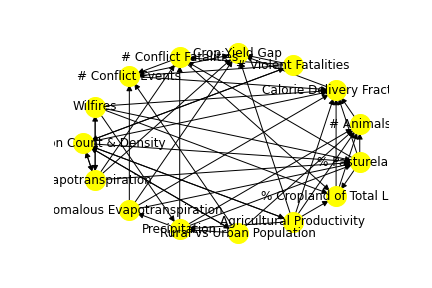

In [ ]:
feature_selection = basis_reduced_features
treatment='wild_fire_raw'
outcome='acl_sum_fatl_m_2'
data_prepared2 = data_prep(df6, treatment, outcome,feature_selection=basis_reduced_features, month_date=None, region=None)
data_to_graph2 = data_prepared2.preprocess()
causal_model2 = StaticCausalModel2(data_to_graph2, method_parameters)
display(Image(filename="causal_model.png"))

In [ ]:

out_filename = "causal_model2.png"
size=(8, 6)
causal_nodes = causal_model2.extract_causal_graph().extract_nodes()
print(causal_nodes.keys())
#graph = nx.DiGraph(nx.read_gml(causal_graph))
#agraph = nx.drawing.nx_agraph.to_agraph(causal_graph)
#agraph.graph_attr.update(size="{},{}!".format(size[0], size[0]))
#agraph.draw(out_filename, format="png", prog=layout)
#display(Image(filename="causal_model2.png"))
#pos = nx.get_node_attributes(agraph,'pos')
#pos
#view_graph2(causal_graph, layout="dot")
out_filename = "causal_model2.png"
agraph = nx.drawing.nx_agraph.to_agraph(causal_model2.networkx_graph())
layout="dot"
agraph.draw(out_filename, format="png", prog=layout)
postionsxy = pd.DataFrame(data = causal_nodes.values(), columns=['X','Y'])
print(postionsxy)
postionsxy[['Vertices']] = causal_nodes.keys()
cols = ['Vertices','X','Y']
postionsxy = postionsxy[cols]
postionsxy


hoi nerd
dict_keys(['local_pop', 'et_actl', 'et_anom', 'spi', 'rural_urban_pop', 'agriculture', 'cropland', 'pasture', 'livestock', 'delivered_calories', 'acl_viol_fatl_m_2', 'crops', 'acl_sum_fatl_m_2', 'acl_sum_evnt_m_2', 'wild_fire_raw'])
        X      Y
0   381.0  738.0
1   303.0  666.0
2   705.0  450.0
3   456.0  522.0
4   633.0  594.0
5   381.0  594.0
6   270.0  234.0
7   277.0  378.0
8   361.0  162.0
9   270.0   90.0
10  931.0  378.0
11  766.0   18.0
12  526.0  306.0
13  822.0  234.0
14  212.0  594.0


,Vertices,X,Y
0,local_pop,381.0,738.0
1,et_actl,303.0,666.0
2,et_anom,705.0,450.0
3,spi,456.0,522.0
4,rural_urban_pop,633.0,594.0
5,agriculture,381.0,594.0
6,cropland,270.0,234.0
7,pasture,277.0,378.0
8,livestock,361.0,162.0
9,delivered_calories,270.0,90.0


### **CausalGraph**

In [ ]:
""" Module containing the main model class for the dowhy package.
"""
import logging

from sympy import init_printing

#import dowhy.graph_learners as graph_learners
import dowhy.causal_estimators as causal_estimators
import dowhy.causal_refuters as causal_refuters
import dowhy.utils.cli_helpers as cli
from dowhy.causal_estimator import CausalEstimate
#from dowhy.causal_graph import CausalGraph
from dowhy.causal_identifier import CausalIdentifier
#from dowhy.causal_identifiers.id_identifier import IDIdentifier
from dowhy.utils.api import parse_state

init_printing()  # To display symbolic math symbols


class CausalModel2:

    """Main class for storing the causal model state.
    """

    def __init__(self, data, treatment, outcome, graph=None,
                 common_causes=None, instruments=None,
                 effect_modifiers=None,
                 estimand_type="nonparametric-ate",
                 proceed_when_unidentifiable=False,
                 missing_nodes_as_confounders=False,
                 identify_vars=False,
                 **kwargs):
        """Initialize data and create a causal graph instance.
        Assigns treatment and outcome variables.
        Also checks and finds the common causes and instruments for treatment
        and outcome.
        At least one of graph, common_causes or instruments must be provided. If
        none of these variables are provided, then learn_graph() can be used later.
        :param data: a pandas dataframe containing treatment, outcome and other
        variables.
        :param treatment: name of the treatment variable
        :param outcome: name of the outcome variable
        :param graph: path to DOT file containing a DAG or a string containing
        a DAG specification in DOT format
        :param common_causes: names of common causes of treatment and _outcome. Only used when graph is None.
        :param instruments: names of instrumental variables for the effect of
        treatment on outcome. Only used when graph is None.
        :param effect_modifiers: names of variables that can modify the treatment effect. If not provided, then the causal graph is used to find the effect modifiers. Estimators will return multiple different estimates based on each value of effect_modifiers.
        :param estimand_type: the type of estimand requested (currently only "nonparametric-ate" is supported). In the future, may support other specific parametric forms of identification.
        :param proceed_when_unidentifiable: does the identification proceed by ignoring potential unobserved confounders. Binary flag.
        :param missing_nodes_as_confounders: Binary flag indicating whether variables in the dataframe that are not included in the causal graph, should be  automatically included as confounder nodes.
        :param identify_vars: Variable deciding whether to compute common causes, instruments and effect modifiers while initializing the class. identify_vars should be set to False when user is providing common_causes, instruments or effect modifiers on their own(otherwise the identify_vars code can override the user provided values). Also it does not make sense if no graph is given.
        :returns: an instance of CausalModel class
        """
        self._data = data
        self._treatment = parse_state(treatment)
        self._outcome = parse_state(outcome)
        self._effect_modifiers = parse_state(effect_modifiers)
        self._estimand_type = estimand_type
        self._proceed_when_unidentifiable = proceed_when_unidentifiable
        self._missing_nodes_as_confounders = missing_nodes_as_confounders
        self.logger = logging.getLogger(__name__)

        if graph is None:
            self.logger.warning("Causal Graph not provided. DoWhy will construct a graph based on data inputs.")
            self._common_causes = parse_state(common_causes)
            self._instruments = parse_state(instruments)
            if common_causes is not None and instruments is not None:
                self._graph = CausalGraph(
                    self._treatment,
                    self._outcome,
                    common_cause_names=self._common_causes,
                    instrument_names=self._instruments,
                    effect_modifier_names=self._effect_modifiers,
                    observed_node_names=self._data.columns.tolist()
                )
            elif common_causes is not None:
                self._graph = CausalGraph(
                    self._treatment,
                    self._outcome,
                    common_cause_names=self._common_causes,
                    effect_modifier_names = self._effect_modifiers,
                    observed_node_names=self._data.columns.tolist()
                )
            elif instruments is not None:
                self._graph = CausalGraph(
                    self._treatment,
                    self._outcome,
                    instrument_names=self._instruments,
                    effect_modifier_names = self._effect_modifiers,
                    observed_node_names=self._data.columns.tolist()
                )
            else:
                self.logger.warning("Relevant variables to build causal graph not provided. You may want to use the learn_graph() function to construct the causal graph.")
                self._graph = None

        else:
            self.init_graph(graph=graph, identify_vars=identify_vars)

        self._other_variables = kwargs
        self.summary()

    def init_graph(self, graph, identify_vars):
        '''
        Initialize self._graph using graph provided by the user.
        '''
        # Create causal graph object
        self._graph = CausalGraph2(
            self._treatment,
            self._outcome,
            graph,
            effect_modifier_names=self._effect_modifiers,
            observed_node_names=self._data.columns.tolist(),
            missing_nodes_as_confounders = self._missing_nodes_as_confounders
        )

        if identify_vars:
            self._common_causes = self._graph.get_common_causes(self._treatment, self._outcome)
            self._instruments = self._graph.get_instruments(self._treatment,
                                                            self._outcome)
            # Sometimes, effect modifiers from the graph may not match those provided by the user.
            # (Because some effect modifiers may also be common causes)
            # In such cases, the user-provided modifiers are used.
            # If no effect modifiers are provided,  then the ones from the graph are used.
            if self._effect_modifiers is None or not self._effect_modifiers:
                self._effect_modifiers = self._graph.get_effect_modifiers(self._treatment, self._outcome)

    def get_common_causes(self):
        self._common_causes = self._graph.get_common_causes(self._treatment, self._outcome)
        return self._common_causes

    def get_instruments(self):
        self._instruments = self._graph.get_instruments(self._treatment, self._outcome)
        return self._instruments

    def get_effect_modifiers(self):
        self._effect_modifiers = self._graph.get_effect_modifiers(self._treatment, self._outcome)
        return self._effect_modifiers

    def learn_graph(self, method_name="cdt.causality.graph.LiNGAM", *args, **kwargs):
        '''
        Learn causal graph from the data. This function takes the method name as input and initializes the
        causal graph object using the learnt graph.
        :param self: instance of the CausalModel class (or its subclass)
        :param method_name: Exact method name of the object to be imported from the concerned library.
        :returns: an instance of the CausalGraph class initialized with the learned graph.
        '''
        # Import causal discovery class
        str_arr = method_name.split(".", maxsplit=1)
        library_name = str_arr[0]
        causal_discovery_class = graph_learners.get_discovery_class_object(library_name)

        model = causal_discovery_class(self._data, method_name, *args, **kwargs)
        graph = model.learn_graph()

        # Initialize causal graph object
        self.init_graph(graph=graph)

        return self._graph

    def identify_effect(self, estimand_type=None,
            method_name="default", proceed_when_unidentifiable=None, optimize_backdoor=False):
        """Identify the causal effect to be estimated, using properties of the causal graph.
        :param method_name: Method name for identification algorithm. ("id-algorithm" or "default")
        :param proceed_when_unidentifiable: Binary flag indicating whether identification should proceed in the presence of (potential) unobserved confounders.
        :returns: a probability expression (estimand) for the causal effect if identified, else NULL
        """
        if proceed_when_unidentifiable is None:
            proceed_when_unidentifiable = self._proceed_when_unidentifiable
        if estimand_type is None:
            estimand_type = self._estimand_type

        if method_name == "id-algorithm":
            self.identifier = IDIdentifier(self._graph,
                                           estimand_type,
                                           method_name,
                                           proceed_when_unidentifiable=proceed_when_unidentifiable)
            identified_estimand = self.identifier.identify_effect()
        else:
            self.identifier = CausalIdentifier(self._graph,
                                               estimand_type,
                                               method_name,
                                               proceed_when_unidentifiable=proceed_when_unidentifiable)
            identified_estimand = self.identifier.identify_effect(optimize_backdoor=optimize_backdoor)

        return identified_estimand

    def estimate_effect(self, identified_estimand, method_name=None,
                        control_value=0,
                        treatment_value=1,
                        test_significance=None, evaluate_effect_strength=False,
                        confidence_intervals=False,
                        target_units="ate", effect_modifiers=None,
                        fit_estimator=True,
                        method_params=None):
        """Estimate the identified causal effect.
        Currently requires an explicit method name to be specified. Method names follow the convention of identification method followed by the specific estimation method: "[backdoor/iv].estimation_method_name". Following methods are supported.
            * Propensity Score Matching: "backdoor.propensity_score_matching"
            * Propensity Score Stratification: "backdoor.propensity_score_stratification"
            * Propensity Score-based Inverse Weighting: "backdoor.propensity_score_weighting"
            * Linear Regression: "backdoor.linear_regression"
            * Generalized Linear Models (e.g., logistic regression): "backdoor.generalized_linear_model"
            * Instrumental Variables: "iv.instrumental_variable"
            * Regression Discontinuity: "iv.regression_discontinuity"
        In addition, you can directly call any of the EconML estimation methods. The convention is "backdoor.econml.path-to-estimator-class". For example, for the double machine learning estimator ("DML" class) that is located inside "dml" module of EconML, you can use the method name, "backdoor.econml.dml.DML". CausalML estimators can also be called. See `this demo notebook <https://microsoft.github.io/dowhy/example_notebooks/dowhy-conditional-treatment-effects.html>`_.
        :param identified_estimand: a probability expression
            that represents the effect to be estimated. Output of
            CausalModel.identify_effect method
        :param method_name: name of the estimation method to be used.
        :param control_value: Value of the treatment in the control group, for effect estimation.  If treatment is multi-variate, this can be a list.
        :param treatment_value: Value of the treatment in the treated group, for effect estimation. If treatment is multi-variate, this can be a list.
        :param test_significance: Binary flag on whether to additionally do a statistical signficance test for the estimate.
        :param evaluate_effect_strength: (Experimental) Binary flag on whether to estimate the relative strength of the treatment's effect. This measure can be used to compare different treatments for the same outcome (by running this method with different treatments sequentially).
        :param confidence_intervals: (Experimental) Binary flag indicating whether confidence intervals should be computed.
        :param target_units: (Experimental) The units for which the treatment effect should be estimated. This can be of three types. (1) a string for common specifications of target units (namely, "ate", "att" and "atc"), (2) a lambda function that can be used as an index for the data (pandas DataFrame), or (3) a new DataFrame that contains values of the effect_modifiers and effect will be estimated only for this new data.
        :param effect_modifiers: Names of effect modifier variables can be (optionally) specified here too, since they do not affect identification. If None, the effect_modifiers from the CausalModel are used.
        :param fit_estimator: Boolean flag on whether to fit the estimator.
        Setting it to False is useful to estimate the effect on new data using a previously fitted estimator.
        :param method_params: Dictionary containing any method-specific parameters. These are passed directly to the estimating method. See the docs for each estimation method for allowed method-specific params.
        :returns: An instance of the CausalEstimate class, containing the causal effect estimate
            and other method-dependent information
        """
        if effect_modifiers is None:
            if self._effect_modifiers is None or len(self._effect_modifiers) == 0:
                effect_modifiers = self.get_effect_modifiers()
            else:
                effect_modifiers = self._effect_modifiers

        if method_name is None:
            #TODO add propensity score as default backdoor method, iv as default iv method, add an informational message to show which method has been selected.
            pass
        else:
            # TODO add dowhy as a prefix to all dowhy estimators
            num_components = len(method_name.split("."))
            str_arr = method_name.split(".", maxsplit=1)
            identifier_name = str_arr[0]
            estimator_name = str_arr[1]
            identified_estimand.set_identifier_method(identifier_name)
            # This is done as all dowhy estimators have two parts and external ones have two or more parts
            if num_components > 2:
                estimator_package =  estimator_name.split(".")[0]
                if estimator_package == 'dowhy': # For updated dowhy methods
                    estimator_method = estimator_name.split(".",maxsplit=1)[1] # discard dowhy from the full package name
                    causal_estimator_class = causal_estimators.get_class_object(estimator_method + "_estimator")
                else:
                    third_party_estimator_package = estimator_package
                    causal_estimator_class = causal_estimators.get_class_object(third_party_estimator_package)
                    if method_params is None:
                        method_params = {}
                    # Define the third-party estimation method to be used
                    method_params["_" + third_party_estimator_package + "_methodname"] = estimator_name
            else: # For older dowhy methods
                # Process the dowhy estimators
                causal_estimator_class = causal_estimators.get_class_object(estimator_name + "_estimator")

        if identified_estimand.no_directed_path:
            self.logger.warning("No directed path from {0} to {1}.".format(
                self._treatment,
                self._outcome))
            estimate = CausalEstimate(0, identified_estimand, None,
                control_value=control_value,
                treatment_value=treatment_value)
        # Check if estimator's target estimand is identified
        elif identified_estimand.estimands[identifier_name] is None:
            self.logger.warning("No valid identified estimand available.")
            estimate = CausalEstimate(None, None, None,
                                  control_value=control_value,
                                  treatment_value=treatment_value)
        else:
            if fit_estimator:
                self.causal_estimator = causal_estimator_class(
                    self._data,
                    identified_estimand,
                    self._treatment, self._outcome, #names of treatment and outcome
                    control_value = control_value,
                    treatment_value = treatment_value,
                    test_significance=test_significance,
                    evaluate_effect_strength=evaluate_effect_strength,
                    confidence_intervals = confidence_intervals,
                    target_units = target_units,
                    effect_modifiers = effect_modifiers,
                    params=method_params)
            else:
                # Estimator had been computed in a previous call
                assert self.causal_estimator is not None
                self.causal_estimator.update_input(treatment_value, control_value,
                        target_units)

            estimate = self.causal_estimator.estimate_effect()
            # Store parameters inside estimate object for refutation methods
            # TODO: This add_params needs to move to the estimator class
            # inside estimate_effect and estimate_conditional_effect
            estimate.add_params(
                estimand_type=identified_estimand.estimand_type,
                estimator_class=causal_estimator_class,
                test_significance=test_significance,
                evaluate_effect_strength=evaluate_effect_strength,
                confidence_intervals=confidence_intervals,
                target_units=target_units,
                effect_modifiers=effect_modifiers,
                method_params=method_params
            )
        return estimate

    def do(self, x, identified_estimand, method_name=None,
           fit_estimator=True, method_params=None):
        """Do operator for estimating values of the outcome after intervening on treatment.
        :param x: interventional value of the treatment variable
        :param identified_estimand: a probability expression
            that represents the effect to be estimated. Output of
            CausalModel.identify_effect method
        :param method_name: any of the estimation method to be used. See docs for estimate_effect method for a list of supported estimation methods.
        :param fit_estimator: Boolean flag on whether to fit the estimator.
        Setting it to False is useful to compute the do-operation on new data using a previously fitted estimator.
        :param method_params: Dictionary containing any method-specific parameters. These are passed directly to the estimating method.
        :returns: an instance of the CausalEstimate class, containing the causal effect estimate
            and other method-dependent information
        """
        if method_name is None:
            pass
        else:
            str_arr = method_name.split(".", maxsplit=1)
            identifier_name = str_arr[0]
            estimator_name = str_arr[1]
            identified_estimand.set_identifier_method(identifier_name)
            causal_estimator_class = causal_estimators.get_class_object(estimator_name + "_estimator")

        # Check if estimator's target estimand is identified
        if identified_estimand.estimands[identifier_name] is None:
            self.logger.warning("No valid identified estimand for using instrumental variables method")
            estimate = CausalEstimate(None, None, None, None, None)
        else:
            if fit_estimator:
                # Note that while the name of the variable is the same,
                # "self.causal_estimator", this estimator takes in less
                # parameters than the same from the
                # estimate_effect code. It is not advisable to use the
                # estimator from this function to call estimate_effect
                # with fit_estimator=False.
                self.causal_estimator = causal_estimator_class(
                    self._data,
                    identified_estimand,
                    self._treatment, self._outcome,
                    test_significance=False,
                    params=method_params
                )
            else:
                # Estimator had been computed in a previous call
                assert self.causal_estimator is not None
            try:
                estimate = self.causal_estimator.do(x)
            except NotImplementedError:
                self.logger.error('Do Operation not implemented or not supported for this estimator.')
                raise NotImplementedError
        return estimate

    def refute_estimate(self, estimand, estimate, method_name=None, **kwargs):
        """Refute an estimated causal effect.
        If method_name is provided, uses the provided method. In the future, we may support automatic selection of suitable refutation tests. Following refutation methods are supported.
            * Adding a randomly-generated confounder: "random_common_cause"
            * Adding a confounder that is associated with both treatment and outcome: "add_unobserved_common_cause"
            * Replacing the treatment with a placebo (random) variable): "placebo_treatment_refuter"
            * Removing a random subset of the data: "data_subset_refuter"
        :param estimand: target estimand, an instance of the IdentifiedEstimand class (typically, the output of identify_effect)
        :param estimate: estimate to be refuted, an instance of the CausalEstimate class (typically, the output of estimate_effect)
        :param method_name: name of the refutation method
        :param kwargs:  (optional) additional arguments that are passed directly to the refutation method. Can specify a random seed here to ensure reproducible results ('random_seed' parameter). For method-specific parameters, consult the documentation for the specific method. All refutation methods are in the causal_refuters subpackage.
        :returns: an instance of the RefuteResult class
        """
        if method_name is None:
            pass
        else:
            refuter_class = causal_refuters.get_class_object(method_name)

        refuter = refuter_class(
            self._data,
            identified_estimand=estimand,
            estimate=estimate,
            **kwargs
        )
        res = refuter.refute_estimate()
        return res

    def extract_nodes(self, layout="dot", size=(8, 6), file_name="causal_model"):
        """View the causal DAG.
        :param layout: string specifying the layout of the graph.
        :param size: tuple (x, y) specifying the width and height of the figure in inches.
        :param file_name: string specifying the file name for the saved causal graph png.
        :returns: a visualization of the graph
        """
        return self._graph.extract_nodes(layout, size, file_name)

    def interpret(self, method_name=None, **kwargs):
        """Interpret the causal model.
        :param method_name: method used for interpreting the model. If None,
                            then default interpreter is chosen that describes the model summary and shows the associated causal graph.
        :param kwargs:: Optional parameters that are directly passed to the interpreter method.
        :returns: None
        """
        if method_name is None:
            self.summary(print_to_stdout=True)
            self.view_model()
            return

        method_name_arr = parse_state(method_name)
        import dowhy.interpreters as interpreters
        for method in method_name_arr:
            interpreter = interpreters.get_class_object(method)
            interpreter(self, **kwargs).interpret()

    def summary(self, print_to_stdout=False):
        """Print a text summary of the model.
        :returns: a string containining the summary
        """
        summary_text = "Model to find the causal effect of treatment {0} on outcome {1}".format(self._treatment, self._outcome)
        self.logger.info(summary_text)
        if print_to_stdout:
            print(summary_text)
        return summary_text

In [ ]:
import itertools
import logging
import re

import networkx as nx

from dowhy.utils.api import parse_state


class CausalGraph2:

    """Class for creating and modifying the causal graph.
       Accepts a graph string (or a text file) in gml format (preferred) and dot format. Graphviz-like attributes can be set for edges and nodes. E.g. style="dashed" as an edge attribute ensures that the edge is drawn with a dashed line.
        If a graph string is not given, names of treatment, outcome, and confounders, instruments and effect modifiers (if any) can be provided to create the graph.
    """

    def __init__(self,
                 treatment_name, outcome_name,
                 graph=None,
                 common_cause_names=None,
                 instrument_names=None,
                 effect_modifier_names=None,
                 mediator_names=None,
                 observed_node_names=None,
                 missing_nodes_as_confounders=False):
        self.treatment_name = parse_state(treatment_name)
        self.outcome_name = parse_state(outcome_name)
        instrument_names = parse_state(instrument_names)
        common_cause_names = parse_state(common_cause_names)
        effect_modifier_names = parse_state(effect_modifier_names)
        mediator_names = parse_state(mediator_names)
        self.logger = logging.getLogger(__name__)

        if graph is None:
            self._graph = nx.DiGraph()
            self._graph = self.build_graph(common_cause_names,
                                           instrument_names,
                                           effect_modifier_names,
                                           mediator_names)
        elif re.match(r".*\.dot", graph):
            # load dot file
            try:
                import pygraphviz as pgv
                self._graph = nx.DiGraph(nx.drawing.nx_agraph.read_dot(graph))
            except Exception as e:
                self.logger.error("Pygraphviz cannot be loaded. " + str(e) + "\nTrying pydot...")
                try:
                    import pydot
                    self._graph = nx.DiGraph(nx.drawing.nx_pydot.read_dot(graph))
                except Exception as e:
                    self.logger.error("Error: Pydot cannot be loaded. " + str(e))
                    raise e
        elif re.match(r".*\.gml", graph):
            self._graph = nx.DiGraph(nx.read_gml(graph))
        elif re.match(r".*graph\s*\{.*\}\s*", graph):
            try:
                import pygraphviz as pgv
                self._graph = pgv.AGraph(graph, strict=True, directed=True)
                self._graph = nx.drawing.nx_agraph.from_agraph(self._graph)
            except Exception as e:
                self.logger.error("Error: Pygraphviz cannot be loaded. " + str(e) + "\nTrying pydot ...")
                try:
                    import pydot
                    P_list = pydot.graph_from_dot_data(graph)
                    self._graph = nx.drawing.nx_pydot.from_pydot(P_list[0])
                except Exception as e:
                    self.logger.error("Error: Pydot cannot be loaded. " + str(e))
                    raise e
        elif re.match(".*graph\s*\[.*\]\s*", graph):
            self._graph = nx.DiGraph(nx.parse_gml(graph))
        else:
            self.logger.error("Error: Please provide graph (as string or text file) in dot or gml format.")
            self.logger.error("Error: Incorrect graph format")
            raise ValueError
        if missing_nodes_as_confounders:
            self._graph = self.add_missing_nodes_as_common_causes(observed_node_names)
        # Adding node attributes
        self._graph = self.add_node_attributes(observed_node_names)

    def extract_nodes(self, layout="twopi", size=(8, 6), file_name="causal_model"):
        out_filename = "{}.png".format(file_name)
        print('hoi nerd')
        import pygraphviz as pgv
        #agraph = nx.drawing.nx_agraph.to_agraph(self._graph)
        #agraph.graph_attr.update(size="{},{}!".format(size[0], size[0]))
        #agraph.draw(out_filename, format="png", prog=layout)
        pos = nx.nx_agraph.graphviz_layout(self._graph, prog="dot")
        return pos
        #except:
            # self.logger.warning("Warning: Pygraphviz cannot be loaded. Check that graphviz and pygraphviz are installed.")
            # self.logger.info("Using Matplotlib for plotting")
            # import matplotlib.pyplot as plt
            # plt.figure(figsize=size)
            # solid_edges = [(n1,n2) for n1,n2, e in self._graph.edges(data=True) if 'style' not in e ]
            # dashed_edges =[(n1,n2) for n1,n2, e in self._graph.edges(data=True) if ('style' in e and e['style']=="dashed") ]
            # plt.clf()

            # pos = nx.layout.shell_layout(self._graph)
            # nx.draw_networkx_nodes(self._graph, pos, node_color='yellow',node_size=400 )
            # nx.draw_networkx_edges(
            #         self._graph,
            #         pos,
            #         edgelist=solid_edges,
            #         arrowstyle="-|>",
            #         arrowsize=12)
            # nx.draw_networkx_edges(
            #         self._graph,
            #         pos,
            #         edgelist=dashed_edges,
            #         arrowstyle="-|>",
            #         style="dashed",
            #         arrowsize=12)

            # labels = nx.draw_networkx_labels(self._graph, pos)

            # plt.axis('off')
            # plt.savefig(out_filename)
            # plt.draw()

    def build_graph(self, common_cause_names, instrument_names,
            effect_modifier_names, mediator_names):
        """ Creates nodes and edges based on variable names and their semantics.
        Currently only considers the graphical representation of "direct" effect modifiers. Thus, all effect modifiers are assumed to be "direct" unless otherwise expressed using a graph. Based on the taxonomy of effect modifiers by VanderWheele and Robins: "Four types of effect modification: A classification based on directed acyclic graphs. Epidemiology. 2007."
        """

        for treatment in self.treatment_name:
            self._graph.add_node(treatment, observed="yes", penwidth=2)
        for outcome in self.outcome_name:
            self._graph.add_node(outcome, observed="yes", penwidth=2)
        for treatment, outcome in itertools.product(self.treatment_name, self.outcome_name):
            # adding penwidth to make the edge bold
            self._graph.add_edge(treatment, outcome, penwidth=2)

        # Adding common causes
        if common_cause_names is not None:
            for node_name in common_cause_names:
                for treatment, outcome in itertools.product(self.treatment_name, self.outcome_name):
                    self._graph.add_node(node_name, observed="yes")
                    self._graph.add_edge(node_name, treatment)
                    self._graph.add_edge(node_name, outcome)

        # Adding instruments
        if instrument_names:
            if type(instrument_names[0]) != tuple:
                if len(self.treatment_name) > 1:
                    self.logger.info("Assuming Instrument points to all treatments! Use tuples for more granularity.")
                for instrument, treatment in itertools.product(instrument_names, self.treatment_name):
                    self._graph.add_node(instrument, observed="yes")
                    self._graph.add_edge(instrument, treatment)
            else:
                for instrument, treatment in itertools.product(instrument_names):
                    self._graph.add_node(instrument, observed="yes")
                    self._graph.add_edge(instrument, treatment)

        # Adding effect modifiers
        if effect_modifier_names is not None:
            for node_name in effect_modifier_names:
                if node_name not in common_cause_names:
                    for outcome in self.outcome_name:
                        self._graph.add_node(node_name, observed="yes")
                        self._graph.add_edge(node_name, outcome, style = "dotted", headport="s", tailport="n")
                        self._graph.add_edge(outcome, node_name, style = "dotted", headport="n", tailport="s") # TODO make the ports more general so that they apply not just to top-bottom node configurations
        if mediator_names is not None:
            for node_name in mediator_names:
                for treatment, outcome in itertools.product(self.treatment_name, self.outcome_name):
                    self._graph.add_node(node_name, observed="yes")
                    self._graph.add_edge(treatment, node_name)
                    self._graph.add_edge(node_name, outcome)
        return self._graph

    def add_node_attributes(self, observed_node_names):
        for node_name in self._graph:
            if node_name in observed_node_names:
                self._graph.nodes[node_name]["observed"] = "yes"
            else:
                self._graph.nodes[node_name]["observed"] = "no"
        return self._graph

    def add_missing_nodes_as_common_causes(self, observed_node_names):
        # Adding columns in the dataframe as confounders that were not in the graph
        for node_name in observed_node_names:
            if node_name not in self._graph:
                self._graph.add_node(node_name, observed="yes")
                for treatment_outcome_node in self.treatment_name + self.outcome_name:
                    self._graph.add_edge(node_name, treatment_outcome_node)
        return self._graph

    def add_unobserved_common_cause(self, observed_node_names, color="gray"):
        # Adding unobserved confounders
        current_common_causes = self.get_common_causes(self.treatment_name,
                                                       self.outcome_name)
        create_new_common_cause = True
        for node_name in current_common_causes:
            if self._graph.nodes[node_name]["observed"] == "no":
                create_new_common_cause = False
        if create_new_common_cause:
            uc_label = "Unobserved Confounders"
            self._graph.add_node('U', label=uc_label, observed="no",
                    color=color, style="filled", fillcolor=color)
            for node in self.treatment_name + self.outcome_name:
                self._graph.add_edge('U', node)
            self.logger.info('If this is observed data (not from a randomized experiment), there might always be missing confounders. Adding a node named "Unobserved Confounders" to reflect this.')
        return self._graph

    def get_unconfounded_observed_subgraph(self):
        observed_nodes = [node for node in self._graph.nodes() if self._graph.nodes[node]["observed"] == "yes"]
        return self._graph.subgraph(observed_nodes)

    def do_surgery(self, node_names, remove_outgoing_edges=False,
                   remove_incoming_edges=False):
        new_graph = self._graph.copy()
        for node_name in node_names:
            if remove_outgoing_edges:
                children = new_graph.successors(node_name)
                edges_bunch = [(node_name, child) for child in children]
                new_graph.remove_edges_from(edges_bunch)
            if remove_incoming_edges:
                parents = new_graph.predecessors(node_name)
                edges_bunch = [(parent, node_name) for parent in parents]
                new_graph.remove_edges_from(edges_bunch)
        return new_graph

    def get_causes(self, nodes, remove_edges = None):
        nodes = parse_state(nodes)
        new_graph=None
        if remove_edges is not None:
            new_graph = self._graph.copy()  # caution: shallow copy of the attributes
            sources = parse_state(remove_edges["sources"])
            targets = parse_state(remove_edges["targets"])
            for s in sources:
                for t in targets:
                    new_graph.remove_edge(s, t)
        causes = set()
        for v in nodes:
            causes = causes.union(self.get_ancestors(v, new_graph=new_graph))
        return causes

    def check_valid_backdoor_set(self, nodes1, nodes2, nodes3, backdoor_paths=None):
        # also return the number of backdoor paths blocked by observed nodes
        if backdoor_paths is None:
            backdoor_paths = self.get_backdoor_paths(nodes1, nodes2)
        d_separated = all([self.is_blocked(path, nodes3) for path in backdoor_paths])
        observed_nodes3 = self.filter_unobserved_variables(nodes3)
        num_paths_blocked = sum([self.is_blocked(path, observed_nodes3) for path in backdoor_paths])
        return {'is_dseparated': d_separated,
                'num_paths_blocked_by_observed_nodes': num_paths_blocked}

    def get_backdoor_paths(self, nodes1, nodes2):
        paths = []
        undirected_graph = self._graph.to_undirected()
        nodes12 = set(nodes1).union(nodes2)
        for node1 in nodes1:
            for node2 in nodes2:
                backdoor_paths = [
                        pth
                        for pth in nx.all_simple_paths(undirected_graph, source=node1, target=node2)
                        if self._graph.has_edge(pth[1], pth[0])]
                # remove paths that have nodes1\node1 or nodes2\node2 as intermediate nodes
                filtered_backdoor_paths = [
                        pth
                        for pth in backdoor_paths
                        if len(nodes12.intersection(pth[1:-1]))==0]
                paths.extend(filtered_backdoor_paths)
        self.logger.debug("Backdoor paths: " + str(paths))
        return paths

    def is_blocked(self, path, conditioned_nodes):
        """ Uses d-separation criteria to decide if conditioned_nodes block given path.
        """

        blocked_by_conditioning = False
        has_unconditioned_collider = False

        for i in range(len(path)-2):
            if self._graph.has_edge(path[i], path[i+1]) and self._graph.has_edge(path[i+2], path[i+1]): # collider
                collider_descendants = nx.descendants(self._graph, path[i+1])
                if path[i+1] not in conditioned_nodes and all(cdesc not in conditioned_nodes for cdesc in collider_descendants):
                    has_unconditioned_collider=True
            else: # chain or fork
                if path[i+1] in conditioned_nodes:
                    blocked_by_conditioning = True
                    break
        if blocked_by_conditioning:
            return True
        elif has_unconditioned_collider:
            return True
        else:
            return False

    def get_common_causes(self, nodes1, nodes2):
        """
        Assume that nodes1 causes nodes2 (e.g., nodes1 are the treatments and nodes2 are the outcomes)
        """
        # TODO Refactor to remove this from here and only implement this logic in causalIdentifier. Unnecessary assumption of nodes1 to be causing nodes2.
        nodes1 = parse_state(nodes1)
        nodes2 = parse_state(nodes2)
        causes_1 = set()
        causes_2 = set()
        for node in nodes1:
            causes_1 = causes_1.union(self.get_ancestors(node))
        for node in nodes2:
            # Cannot simply compute ancestors, since that will also include nodes1 and its parents (e.g. instruments)
            parents_2 = self.get_parents(node)
            for parent in parents_2:
                if parent not in nodes1:
                    causes_2 = causes_2.union(set([parent,]))
                    causes_2 = causes_2.union(self.get_ancestors(parent))
        return list(causes_1.intersection(causes_2))

    def get_effect_modifiers(self, nodes1, nodes2):
        modifiers = set()
        for node in nodes2:
            modifiers = modifiers.union(self.get_ancestors(node))
        modifiers = modifiers.difference(nodes1)
        for node in nodes1:
            modifiers = modifiers.difference(self.get_ancestors(node))
        # removing all mediators
        for node1 in nodes1:
            for node2 in nodes2:
                all_directed_paths = nx.all_simple_paths(self._graph, node1, node2)
                for path in all_directed_paths:
                    modifiers=modifiers.difference(path)
        return list(modifiers)

    def get_parents(self, node_name):
        return set(self._graph.predecessors(node_name))

    def get_ancestors(self, node_name, new_graph=None):
        if new_graph is None:
            graph=self._graph
        else:
            graph=new_graph
        return set(nx.ancestors(graph, node_name))

    def get_descendants(self, nodes):
        descendants = set()
        for node_name in nodes:
            descendants = descendants.union(set(nx.descendants(self._graph, node_name)))
        return descendants

    def all_observed(self, node_names):
        for node_name in node_names:
            if self._graph.nodes[node_name]["observed"] != "yes":
                return False

        return True

    def get_all_nodes(self, include_unobserved=True):
        nodes = self._graph.nodes
        if not include_unobserved:
            nodes = set(self.filter_unobserved_variables(nodes))

        return nodes

    def filter_unobserved_variables(self, node_names):
        observed_node_names = list()
        for node_name in node_names:
            if self._graph.nodes[node_name]["observed"] == "yes":
                observed_node_names.append(node_name)

        return observed_node_names

    def get_instruments(self, treatment_nodes, outcome_nodes):
        treatment_nodes = parse_state(treatment_nodes)
        outcome_nodes = parse_state(outcome_nodes)
        parents_treatment = set()
        for node in treatment_nodes:
            parents_treatment = parents_treatment.union(self.get_parents(node))
        g_no_parents_treatment = self.do_surgery(treatment_nodes,
                                                 remove_incoming_edges=True)
        ancestors_outcome = set()
        for node in outcome_nodes:
            ancestors_outcome = ancestors_outcome.union(nx.ancestors(g_no_parents_treatment, node))
        # [TODO: double check these work with multivariate implementation:]
        # Exclusion
        candidate_instruments = parents_treatment.difference(ancestors_outcome)
        self.logger.debug("Candidate instruments after satisfying exclusion: %s",
                          candidate_instruments)
        # As-if-random setup
        children_causes_outcome = [nx.descendants(g_no_parents_treatment, v)
                                   for v in ancestors_outcome]
        children_causes_outcome = set([item
                                       for sublist in children_causes_outcome
                                       for item in sublist])

        # As-if-random
        instruments = candidate_instruments.difference(children_causes_outcome)
        self.logger.debug("Candidate instruments after satisfying exclusion and as-if-random: %s",
                instruments)
        return list(instruments)


    def get_all_directed_paths(self, nodes1, nodes2):
        """ Get all directed paths between sets of nodes.
        Currently only supports singleton sets.
        """
        node1 = nodes1[0]
        node2 = nodes2[0]
        # convert the outputted generator into a list
        return [p for p in nx.all_simple_paths(self._graph, source=node1, target=node2)]

    def has_directed_path(self, nodes1, nodes2):
        """ Checks if there is any directed path between two sets of nodes.
        Currently only supports singleton sets.
        """
        dpaths = self.get_all_directed_paths(nodes1, nodes2)
        return len(dpaths) > 0

    def get_adjacency_matrix(self, *args, **kwargs):
        '''
        Get adjacency matrix from the networkx graph
        '''
        return nx.convert_matrix.to_numpy_matrix(self._graph, *args, **kwargs)

    def check_valid_frontdoor_set(self, nodes1, nodes2, candidate_nodes, frontdoor_paths=None):
        """Check if valid the frontdoor variables for set of treatments, nodes1 to set of outcomes, nodes2.
        """
        if frontdoor_paths is None:
            frontdoor_paths = self.get_all_directed_paths(nodes1, nodes2)

        d_separated = all([self.is_blocked(path, candidate_nodes) for path in frontdoor_paths])
        return d_separated

    def check_valid_mediation_set(self, nodes1, nodes2, candidate_nodes, mediation_paths=None):
        """Check if candidate nodes are valid mediators for set of treatments, nodes1 to set of outcomes, nodes2.
        """
        if mediation_paths is None:
            mediation_paths = self.get_all_directed_paths(nodes1, nodes2)

        is_mediator = any([self.is_blocked(path, candidate_nodes) for path in mediation_paths])
        return is_mediator

### **Extracting Positions**

In [ ]:
bins = np.linspace(postionsxy['Y'].min(), postionsxy['Y'].max(), 6)
postionsxy['level'] = np.digitize(postionsxy['Y'], bins, right=False)
postionsxy['Treatment'] = postionsxy['Vertices'].map(dict(zip(df6.columns,column_names)))
postionsxy

,Vertices,X,Y,level,Treatment
0,local_pop,381.0,738.0,6,Population Count & Density
1,et_actl,303.0,666.0,5,Evapotranspiration
2,et_anom,705.0,450.0,4,Anomalous Evapotranspiration
3,spi,456.0,522.0,4,Precipitation
4,rural_urban_pop,633.0,594.0,5,Rural vs Urban Population
5,agriculture,381.0,594.0,5,Agricultural Productivity
6,cropland,270.0,234.0,2,% Cropland of Total Land
7,pasture,277.0,378.0,3,% Pastureland
8,livestock,361.0,162.0,2,# Animals
9,delivered_calories,270.0,90.0,1,Calorie Delivery Fraction


In [ ]:
causal_output = causal_output.merge(effect_dataframe, on='Treatment', how='left')

In [ ]:
causal_output.loc[causal_output['Standard_Deviation']>0.5,['Causal_Effect','Standard_Deviation']] = np.nan
causal_output

,Treatment,Outcome,Paths,Causal_Effect,Standard_Deviation
0,Evapotranspiration,# Conflict Fatalities,"[[Evapotranspiration, Population Count & Densi...",NaN,NaN
1,Anomalous Evapotranspiration,# Conflict Fatalities,"[[Anomalous Evapotranspiration, % Pastureland,...",0.007014,0.002157
2,Precipitation,# Conflict Fatalities,"[[Precipitation, Anomalous Evapotranspiration,...",0.012342,0.001931
3,% Pastureland,# Conflict Fatalities,"[[% Pastureland, # Conflict Fatalities]]",0.006205,0.001749
4,Wilfires,# Conflict Fatalities,"[[Wilfires, Evapotranspiration, Population Cou...",NaN,NaN


## **Saving Files**

In [ ]:
# Renamig and including the causal effect and standard deviation
causal_output = causal_output.assign(Node_names = causal_output.Treatment.astype(str) + ': ' + \
  causal_output.Causal_Effect.round(3).astype(str) + ', (' + (causal_output.Standard_Deviation.round(3).astype(str))+ ')' )

### **Dot**

In [ ]:
#Node Names:
output_graph = causal_model.networkx_graph()
attributes = pd.DataFrame(data = nx.spring_layout(output_graph).keys(), columns=['Treatment']) 
attributes = pd.merge(attributes, causal_output[['Treatment','Node_names']], how='left', on='Treatment') 
attributes.loc[attributes['Treatment']=='# Conflict Fatalities','Node_names']='Outcome: # Conflict Fatalities'
attributes.Node_names.fillna(attributes.Treatment, inplace=True)
attributes

,Treatment,Node_names
0,Population Count & Density,Population Count & Density
1,Evapotranspiration,"Evapotranspiration: nan, (nan)"
2,Anomalous Evapotranspiration,"Anomalous Evapotranspiration: 0.008, (0.002)"
3,Precipitation,"Precipitation: 0.011, (0.002)"
4,Rural vs Urban Population,Rural vs Urban Population
5,Agricultural Productivity,Agricultural Productivity
6,% Cropland of Total Land,% Cropland of Total Land
7,% Pastureland,"% Pastureland: 0.007, (0.003)"
8,# Animals,# Animals
9,Calorie Delivery Fraction,Calorie Delivery Fraction


In [ ]:
# Color Labels
colors = causal_output[['Treatment','Causal_Effect']]

# Try to map values to colors in hex
norm = matplotlib.colors.Normalize(vmin=-1, vmax=1, clip=True)
mapper = plt.cm.ScalarMappable(norm=norm, cmap=plt.cm.RdYlGn_r)
colors['Color_Hex'] = colors['Causal_Effect'].apply(lambda x: mcolors.to_hex(mapper.to_rgba(x)))
attributes = pd.merge(attributes, colors[['Treatment','Color_Hex']], how='left', on='Treatment') 

attributes.loc[attributes['Treatment']=='# Conflict Fatalities','Color_Hex']='#0095ff' # Blue for the outcome
attributes.fillna('#ffffff', inplace=True) # rest of colors is just white
attributes['fontcolor']='black'

In [ ]:
attributes

,Treatment,Node_names,Color_Hex,fontcolor
0,Population Count & Density,Population Count & Density,#ffffff,black
1,Evapotranspiration,"Evapotranspiration: nan, (nan)",#000000,black
2,Anomalous Evapotranspiration,"Anomalous Evapotranspiration: 0.008, (0.002)",#fffdbc,black
3,Precipitation,"Precipitation: 0.011, (0.002)",#fffdbc,black
4,Rural vs Urban Population,Rural vs Urban Population,#ffffff,black
5,Agricultural Productivity,Agricultural Productivity,#ffffff,black
6,% Cropland of Total Land,% Cropland of Total Land,#ffffff,black
7,% Pastureland,"% Pastureland: 0.007, (0.003)",#fffebe,black
8,# Animals,# Animals,#ffffff,black
9,Calorie Delivery Fraction,Calorie Delivery Fraction,#ffffff,black


In [ ]:
# Code positions
attributes = pd.merge(attributes, postionsxy[['Treatment','X','Y']], how='left', on='Treatment') 

In [ ]:
#Edge labels
edge_attributes=pd.DataFrame(data = output_graph.edges, columns=['From','To']) 
edge_attributes['color'] = 'black'
edge_attributes['fontcolor'] = 'black'

In [ ]:
edgecolormapping = dict(zip(list(zip(edge_attributes.From,edge_attributes.To)), edge_attributes.color))
edgefontcolormapping = dict(zip(list(zip(edge_attributes.From,edge_attributes.To)), edge_attributes.color))

In [ ]:
colormapping = dict(zip(attributes.Treatment, attributes.Color_Hex))
labelmapping = dict(zip(attributes.Treatment, attributes.Node_names))
fontcolormapping = dict(zip(attributes.Treatment, attributes.fontcolor))
xmapping = dict(zip(attributes.Treatment, attributes.X))
ymapping = dict(zip(attributes.Treatment, attributes.Y))

In [ ]:
output_graph = causal_model.networkx_graph()
nx.get_node_attributes(output_graph,'label')
nx.set_node_attributes(output_graph, colormapping, name="fillcolor")
nx.set_node_attributes(output_graph, labelmapping, name="label")
nx.set_node_attributes(output_graph, fontcolormapping, name="color")
nx.set_node_attributes(output_graph, xmapping, name="x")
nx.set_node_attributes(output_graph, ymapping, name="y")
nx.get_node_attributes(output_graph,'x')

{'# Animals': 803.0,
 '# Conflict Events': 299.0,
 '# Conflict Fatalities': 431.0,
 '# Violent Fatalities': 259.0,
 '% Cropland of Total Land': 539.0,
 '% Pastureland': 621.0,
 'Agricultural Productivity': 457.0,
 'Anomalous Evapotranspiration': 437.0,
 'Calorie Delivery Fraction': 380.0,
 'Crop Yield Gap': 459.0,
 'Evapotranspiration': 560.0,
 'Population Count & Density': 329.0,
 'Precipitation': 341.0,
 'Riverine Flooding': 145.0,
 'Rural vs Urban Population': 329.0}

In [ ]:
nx.set_edge_attributes(output_graph, edgecolormapping, name="color")
nx.set_edge_attributes(output_graph, edgecolormapping, name="fontcolor")

In [ ]:
dotfile = nx.drawing.nx_pydot.write_dot(output_graph, "Riverine_Flooding.dot")
from google.colab import files
files.download('Riverine_Flooding.dot')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **Excel**

In [ ]:
graph = causal_model.networkx_graph()
froms = [i[0] for i in graph.edges]
tos = [i[1] for i in graph.edges]

In [ ]:
edge_frame = pd.DataFrame(data= np.array([froms, tos]).T,columns=['From', 'To'])
edge_frame

,From,To
0,Population Count & Density,Evapotranspiration
1,Population Count & Density,Rural vs Urban Population
2,Population Count & Density,Agricultural Productivity
3,Population Count & Density,% Pastureland
4,Population Count & Density,Calorie Delivery Fraction
5,Population Count & Density,# Violent Fatalities
6,Evapotranspiration,Population Count & Density
7,Evapotranspiration,% Pastureland
8,Evapotranspiration,Crop Yield Gap
9,Evapotranspiration,# Conflict Fatalities


In [ ]:
writer = pd.ExcelWriter('causal_output.xlsx')#, engine='xlsxwriter')
postionsxy.to_excel(writer, sheet_name='Sheet1')
edge_frame.to_excel(writer, sheet_name='Sheet2')
causal_output.to_excel(writer, sheet_name='Sheet3')
writer.save()


In [ ]:
from google.colab import files
files.download('causal_output.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
causal_model.view_graph()

In [ ]:
#Start with water variables
treatments =['spi','et_actl','et_anom']
#Check for every combination if manually observed identifiable, else continue
# If observed identifiable try identifiying and estimating, else continue
i=0
for treat, month, region in product(treatments, month_dates, regions):
  i+=1
  print(i, treat,month,region)
  if  identifiables.loc[(identifiables.Regions == region) & (identifiables.Month == month) & (identifiables.Treatment == treat),'Identifiable'].iloc[0] == 1:
    file ='dimensionality_reduced_slice_TSNE_boosted_complete_robust_scaler_50_copy_2_'+month+'_'+region+'_flat.h5'
    !gsutil -m cp -r gs://wps_pillar1a/data_working/phase_2/datacube_objects/HCSS_deliverables/"$file" .
    df = pd.read_hdf(file, "table")
    data_to_preprocess = df[['local_pop', 'et_actl', 'et_anom', 
                                  'spi', 'rural_urban_pop', 'agriculture', 'cropland',
                                  'pasture', 'livestock', 'delivered_calories', 'acl_viol_fatl_m_2', 'acl_batt_fatl_m_2', 
                                  'crops', 'acl_sum_fatl_m_2', 'acl_sum_evnt_m_2']]
    data_prepared = data_prep_con(data_to_preprocess, treat, outcome, thresholds, month_date=None, region=None)
    data_to_graph = data_prepared.preprocess()
    causal_model = StaticCausalModel(data_to_graph, method_parameters)
    try:
      identified_effect = causal_model.identification()
      try:
        estimated_effect, standard_error = causal_model.estimation()
        identifiables.loc[(identifiables.Regions == region) & (identifiables.Month == month) & (identifiables.Treatment == treat),'Causal_Estimate'] = estimated_effect.value
        identifiables.loc[(identifiables.Regions == region) & (identifiables.Month == month) & (identifiables.Treatment == treat),'Standard_Error'] = standard_error
      except:
        continue
    except:
      continue 
  else:
    continue

## Old **model**

In [ ]:
class data_prep_con:
  def __init__(self, data_to_preprocess, treatment, outcome, thresholds, month_date, region):
    self.data = data_to_preprocess
    self.treat = treatment
    self.out = outcome
    self.md = month_date
    self.thres = thresholds
    self.region = region
    print(self.region)
    
  def preprocess(self):
    data_=self.data
    if self.md!= None:
      data_ = self.data.loc[self.data.index.get_level_values(level = 'month_date') == self.md] # set data to specific month
      data_ = data_.droplevel(['month_date']) # drops the column
    if self.region!= None:  
      data_ = data_.loc[data_.index.get_level_values(level = 'region') == self.region] # set data to specific region
      data_ = data_.droplevel(['region']) # drops the column
    data_ = data_.rename(columns={self.treat:'treatment: '+ self.treat}) #rename column names outcome and treatment
    data_ = data_.rename(columns={self.out:'outcome: '+ self.out}) #rename column names outcome and treatment
    data_=data_.dropna()
    return data_

In [ ]:
class StaticCausalModel2:
  # Note this class function mixes cdt functions to extract the causal graph with dowhy functions to identify, estimate and refute the causal effect.
  def __init__(self, data_to_graph, method_parameters):
    self.data = data_to_graph
    self.method_params = method_parameters
    self.glasso = cdt.independence.graph.Glasso()
    self.ges = cdt.causality.graph.GES()

  def extract_causal_graph(self):
    skeleton = self.glasso.predict(self.data)
    output_graph = self.ges.predict(self.data, skeleton)
    nx.write_gml(output_graph, "G.gml")
    # CausalModel is a dowhy function to initiate the model based on the extracted causal graph. 
    return CausalModel(data = self.data, treatment='treatment: '+treatment, outcome='outcome: '+outcome, graph= 'G.gml') # Note this is the model input required by dowhy

  def view_graph(self):
    return StaticCausalModel2.extract_causal_graph(self).view_model(layout="dot")

  def identification(self):
    return StaticCausalModel2.extract_causal_graph(self).identify_effect()

  def estimation(self):
    #Dowhy function estimate_effect to estimate effect. Note we use generalized linear model
    glm_estimate = StaticCausalModel2.extract_causal_graph(self).estimate_effect(identified_estimand = StaticCausalModel.identification(self), method_name="backdoor.generalized_linear_model", 
                                                                                test_significance=True, confidence_intervals = True, method_params = self.method_params)
    return glm_estimate, glm_estimate.get_standard_error(method = "bootstrap") 

  def refutation_by_random_common_cause(self):
    glm_estimate, glm_estimate_standard_error = StaticCausalModel.estimation(self)
    random_common_cause = StaticCausalModel.extract_causal_graph(self).refute_estimate(StaticCausalModel.identification(self), glm_estimate, method_name="random_common_cause")
    return random_common_cause

  def refutation_by_bootstrap(self):
    glm_estimate, glm_estimate_standard_error = StaticCausalModel.estimation(self)
    placebo = StaticCausalModel.extract_causal_graph(self).refute_estimate(StaticCausalModel.identification(self), glm_estimate, method_name="bootstrap_refuter")
    return placebo

  def refutation_by_data_subset(self):
    glm_estimate, glm_estimate_standard_error = StaticCausalModel.estimation(self)
    subset=StaticCausalModel.extract_causal_graph(self).refute_estimate(StaticCausalModel.identification(self), glm_estimate, method_name="data_subset_refuter", subset_fraction=0.9, random_seed = 1)
    return subset

  def refutation_by_unobserved_common_cause(self):
    glm_estimate, glm_estimate_standard_error = StaticCausalModel.estimation(self)
    unobserved=StaticCausalModel.extract_causal_graph(self).refute_estimate(StaticCausalModel.identification(self), glm_estimate, method_name="add_unobserved_common_cause", confounders_effect_on_treatment="binary_flip", 
                                         confounders_effect_on_outcome="linear", effect_strength_on_treatment=0.01, effect_strength_on_outcome=0.02)
    return unobserved

              spi     et_actl  ...  acl_viol_fatl_m_2  acl_sum_fatl_m_2
0      -14.836181  301.927704  ...                0.0               0.0
1      317.368256  -86.972954  ...                0.0              16.0
2      207.167938 -101.284508  ...                0.0               0.0
3      -42.941261 -205.951859  ...                0.0               0.0
4       48.055218 -204.147217  ...                0.0               0.0
...           ...         ...  ...                ...               ...
28685 -210.598511  -72.506592  ...                0.0               0.0
28686 -216.566528  -78.247032  ...                0.0               1.0
28687 -191.403137 -215.026062  ...                0.0               0.0
28688 -191.519714  -77.698990  ...                0.0               0.0
28689 -191.642746  229.621567  ...                0.0               0.0

[28690 rows x 27 columns]
None


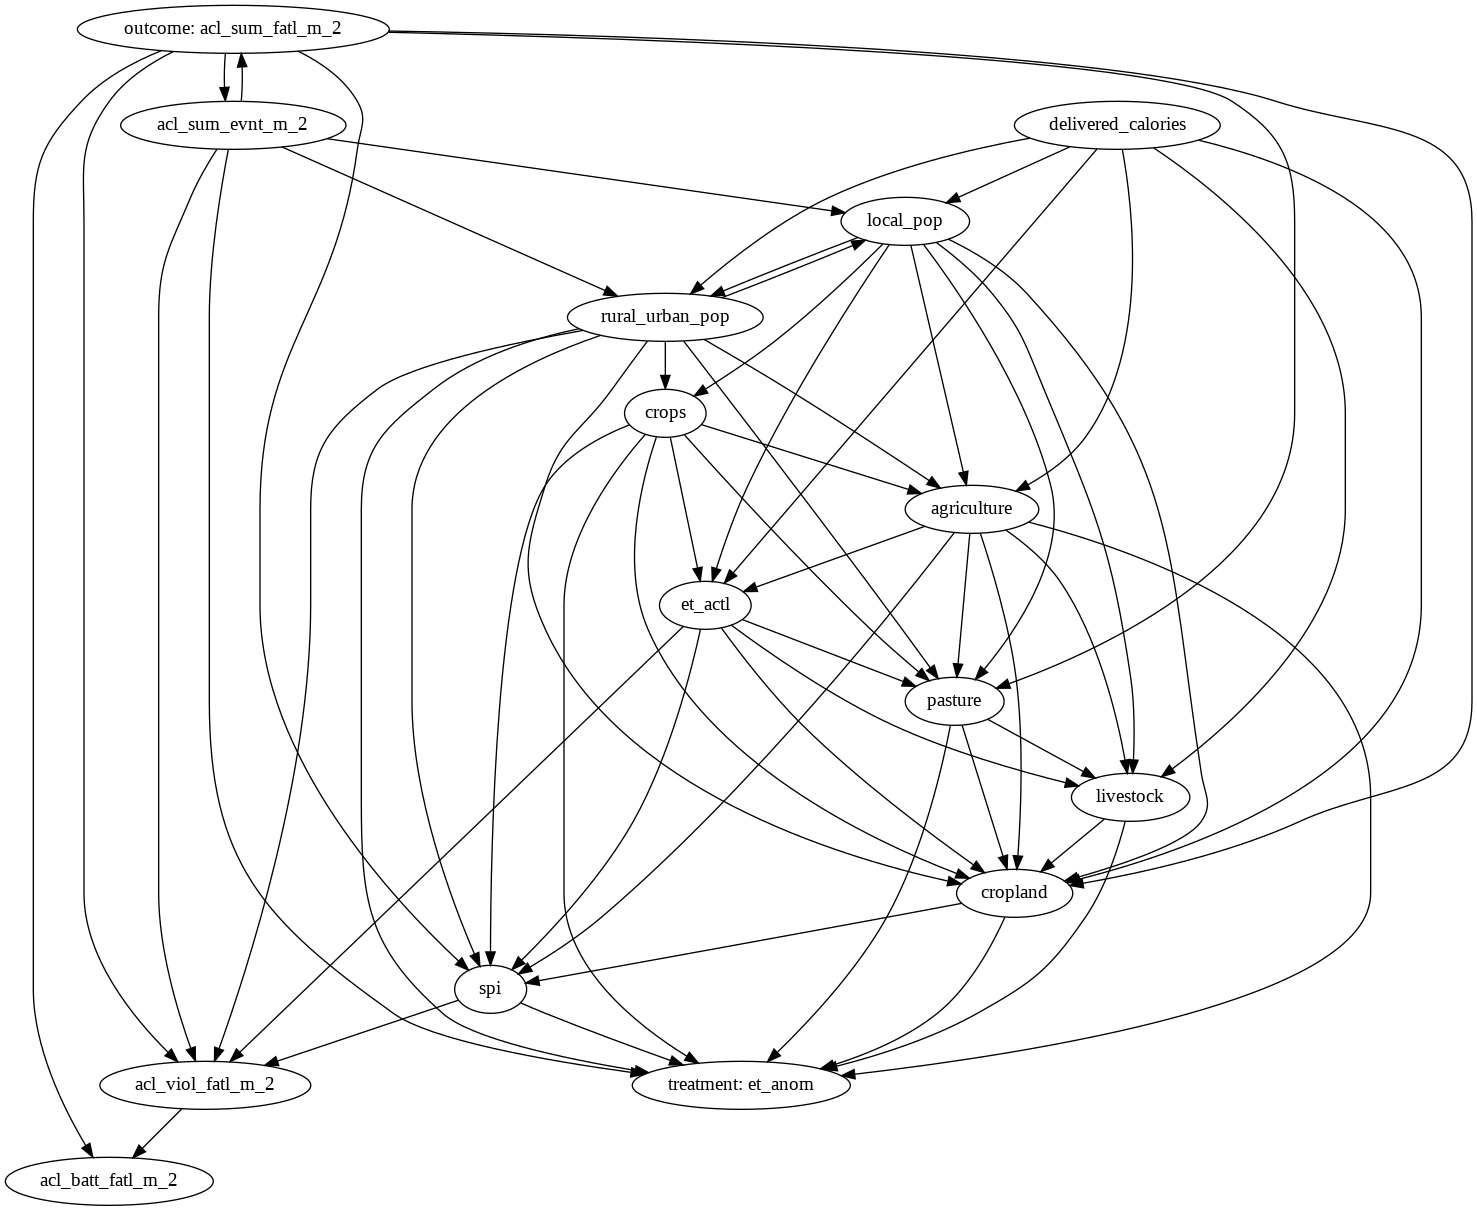

In [ ]:
df2 = pd.read_hdf("dimensionality_reduced_slice_TSNE_boosted_complete_robust_scaler_50_copy_2_flat.h5", "table")
print(df2)
data_to_preprocess1 = df2[['local_pop', 'et_actl', 'et_anom', 
                                  'spi', 'rural_urban_pop', 'agriculture', 'cropland',
                                  'pasture', 'livestock', 'delivered_calories', 'acl_viol_fatl_m_2', 'acl_batt_fatl_m_2', 
                                  'crops', 'acl_sum_fatl_m_2', 'acl_sum_evnt_m_2']]

#Since causal climate effects on security are hypothesized to be seasonal, one can alternatively try estimating them 6 months earlier, on March 1, 2020.
#Seasonality should be fully taken into account and dealt with in the context of causal inference with time-series data. 
#However, this is currently not possible because of the lagged dependencies.
month_date = None #md = '2020-03-01'
region=None
#The standard deviation of anomalous evapotranspiration ('et_anom_m_STD_m') variable is specified as the treatment.
treatment = 'et_anom' #Alternative choices of the treatment are possible (e.g., treatment = 'Cropland2000_mean_percent_s')
#However, specifying the 'et_anom_m_STD_m' variable as the treatment gives the most interpretable causal graph.

#The following specification calibrates the treatment when converting a non-binary variable into a binary variable. Causal structural models do not require this. 
#However, this is done in order to stay in line with coarsened exact matching that requires treatment to be binary. 
thresholds =  np.array([0.25, 0.75])

#The counted events ('acl_sum_evnt_m') variable is specified as the outcome.
outcome = 'acl_sum_fatl_m_2' #Alternatively, the counted events can be specified as the outcome: outcome = 'acl_sum_evnt_m'

#The modeling specifications for other possible treatments and outcomes are used when calling the data_prep class.
data_prepared = data_prep_con(data_to_preprocess1, treatment, outcome, thresholds, month_date, region)
data_to_graph = data_prepared.preprocess()
method_parameters = {'num_null_simulations':50, 'method': 'bootstrap', 'num_simulations':50, 'control_value':0, 'treatment_value':1, 
                 'need_conditional_estimates': False, 'fit_method': "statsmodels", 'glm_family':statsmodels.api.families.NegativeBinomial(alpha=0.001)} #Conflicts are sticky. Thus, we use the Negative Binomial distributions. Alternatively, one can use Poisson()

causal_model2 = StaticCausalModel2(data_to_graph, method_parameters)
#Printing the static causal graph:
causal_model2.view_graph()
display(Image(filename="causal_model.png"))